In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/data_coconut_oil.csv')

In [3]:
df=df.reset_index()['Column3']


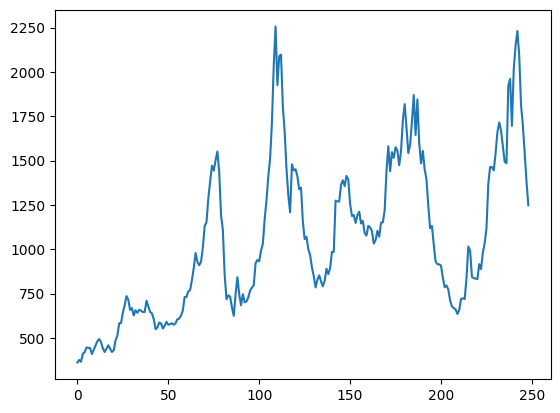

In [4]:
import matplotlib.pyplot as plt
plt.plot(df)


In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [6]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

training_size,test_size

(186, 63)

In [7]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [9]:
print(X_train.shape), print(y_train.shape)

(165, 20)
(165,)


(None, None)

In [10]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2022-12-14 13:58:10.049620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model=Sequential()
model.add(LSTM(10,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(10,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2022-12-14 13:58:15.032657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 7s 591ms/step - loss: 0.1744 - val_loss: 0.2833
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1527 - val_loss: 0.2546
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1334 - val_loss: 0.2270
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1148 - val_loss: 0.1994
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0966 - val_loss: 0.1711
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0792 - val_loss: 0.1422
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0624 - val_loss: 0.1138
Epoch 8/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0477 - val_loss: 0.0877
Epoch 9/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0379 - val_loss: 0.0672
Epoch 10/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0336 - val_loss: 0.0555
Epoch 11/100
3/3 [

In [14]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [15]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [16]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1094.9354305902436

In [17]:
math.sqrt(mean_squared_error(ytest,test_predict))

1240.1377835331405

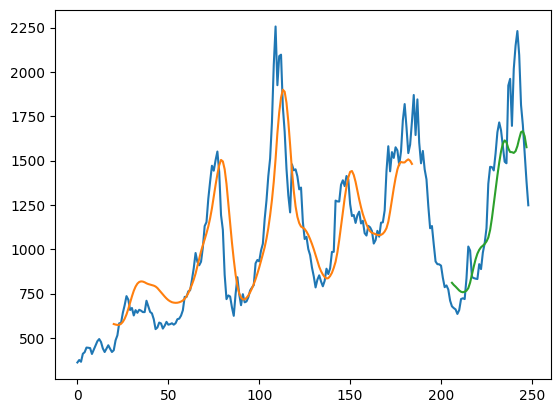

In [18]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [19]:
len(test_data)

63

In [20]:
x_input=test_data[43:].reshape(1,-1)
x_input.shape

(1, 20)

In [21]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [22]:
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<36):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.53910613]
21
1 day input [0.62230729 0.685132   0.71448786 0.69096093 0.64524287 0.5974868
 0.59292503 0.82410771 0.84407603 0.70417635 0.87335797 0.94291975
 0.9863886  0.91478881 0.76627772 0.70670539 0.62224393 0.53989968
 0.46784583 0.53910613]
1 day output [[0.48860726]]
2 day input [0.685132   0.71448786 0.69096093 0.64524287 0.5974868  0.59292503
 0.82410771 0.84407603 0.70417635 0.87335797 0.94291975 0.9863886
 0.91478881 0.76627772 0.70670539 0.62224393 0.53989968 0.46784583
 0.53910613 0.48860726]
2 day output [[0.44451258]]
3 day input [0.71448786 0.69096093 0.64524287 0.5974868  0.59292503 0.82410771
 0.84407603 0.70417635 0.87335797 0.94291975 0.9863886  0.91478881
 0.76627772 0.70670539 0.62224393 0.53989968 0.46784583 0.53910613
 0.48860726 0.44451258]
3 day output [[0.4067802]]
4 day input [0.69096093 0.64524287 0.5974868  0.59292503 0.82410771 0.84407603
 0.70417635 0.87335797 0.94291975 0.9863886  0.91478881 0.76627772
 0.70670539 0.62224393 0.53989968 0.46784583 0

In [23]:
day_new=np.arange(1,21)
day_pred=np.arange(21,57)

In [24]:
import matplotlib.pyplot as plt

In [25]:
len(df1)

249

In [26]:
scaler.inverse_transform(lst_output)

array([[1383.06701136],
       [1287.4221459 ],
       [1203.90681869],
       [1132.44172364],
       [1072.02529007],
       [1021.44224423],
       [ 979.67312217],
       [ 945.88642377],
       [ 919.41129309],
       [ 900.10221338],
       [ 885.90580666],
       [ 875.53635508],
       [ 871.02352947],
       [ 870.78741753],
       [ 874.43041646],
       [ 880.5183565 ],
       [ 887.93005872],
       [ 898.14479291],
       [ 910.32276148],
       [ 924.15904528],
       [ 939.50507951],
       [ 959.26933652],
       [ 979.62853014],
       [1000.55646962],
       [1022.00658733],
       [1043.87711185],
       [1066.00683457],
       [1088.18662453],
       [1110.17528969],
       [1131.71323675],
       [1152.54109818],
       [1172.38166964],
       [1190.9641816 ],
       [1208.07797909],
       [1223.51946282],
       [1237.11963469]])

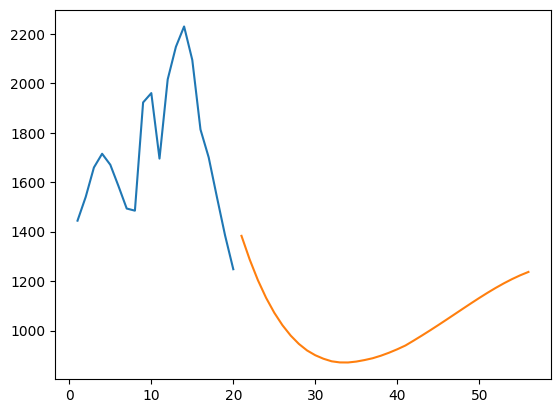

In [27]:
plt.plot(day_new,scaler.inverse_transform(df1[229:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

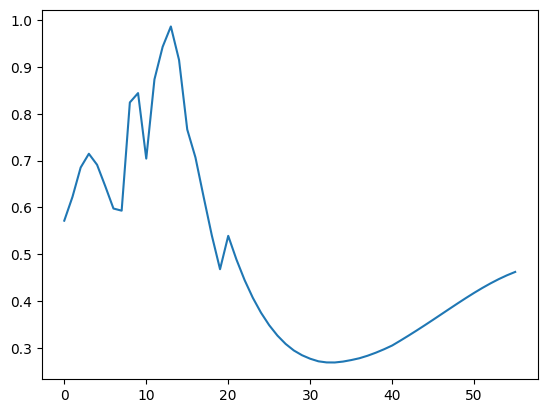

In [28]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[229:])

In [29]:
df3=scaler.inverse_transform(df3).tolist()

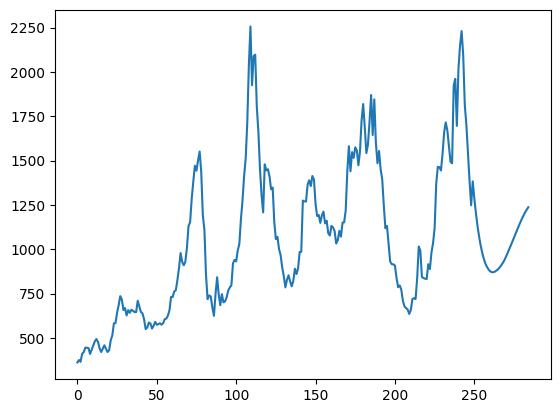

In [30]:
plt.plot(df3)

In [34]:
import pandas as pd
date = pd.date_range('2002-01-01', periods=len(df3), freq='1M')
print(len(df3), len(date))

285 285


<AxesSubplot: title={'center': 'Three-year coconut oil price forecast'}, xlabel='Year', ylabel='U.S. Dollar / ton'>

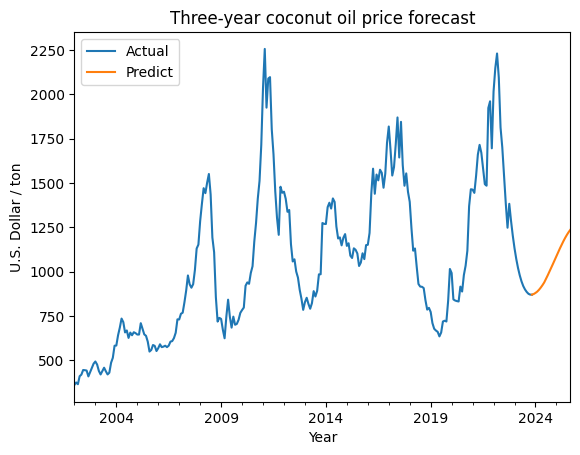

In [33]:
df_part = pd.DataFrame(
        index=date[0:263],
        columns=['Actual'],
        data=df3[0:263]
    )

df_future = pd.DataFrame(
        index=date[262:],
        columns=['Predict'],
        data=df3[262:]
    )

result = df_part.join(df_future, how='outer')
result.plot(title="Three-year coconut oil price forecast", xlabel="Year", ylabel="U.S. Dollar / ton")